# Harris Corner Detection, Chessboard

## import resources and display image

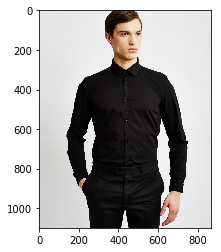

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/black_shirt.jpg')


image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

image2 = cv2.imread('images/skewed_chessboard.png')
image_copy2 = np.copy(image2)
image_copy2 = cv2.cvtColor(image_copy2, cv2.COLOR_BGR2RGB)

## Detect corners

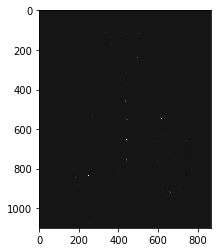

In [9]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

# Convert to float type
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
## 2 by 2 pixels. 3 sobel, 0.04 is corner(typical)

# Dilate Conrner
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

## Select and display strong corners

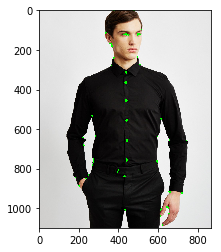

In [16]:
# Define a threashold for extracting strong corners
# This value may vary depending on the image
thresh = 0.01*dst.max()

# Create an image copy to draw corners on 
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle(corner_image, (i, j), 2, (0,255,0), 1)
            
plt.imshow(corner_image)

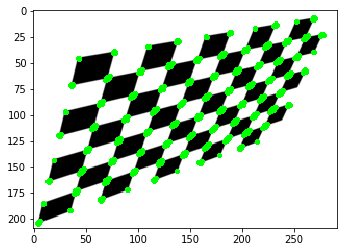

In [22]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy2, cv2.COLOR_BGR2GRAY)

# Convert to float type
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.04)
## 2 by 2 pixels. 3 sobel, 0.04 is corner(typical)

# Dilate Conrner
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap='gray')

# Define a threashold for extracting strong corners
# This value may vary depending on the image
thresh = 0.01*dst.max()

# Create an image copy to draw corners on 
corner_image = np.copy(image_copy2)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            cv2.circle(corner_image, (i, j), 1, (0,255,0), 1)
            
plt.imshow(corner_image)

In [ ]:
# Reads in a binary image
image = cv2.imread(‘images/j.png’, 0) 

# Create a 5x5 kernel of ones
kernel = np.ones((5,5),np.uint8)

# Dilate the image
dilation = cv2.dilate(image, kernel, iterations = 1)

# Erode the image
erosion = cv2.erode(image, kernel, iterations = 1)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)